In [11]:
using Gadfly
#
# the forward difference function - f(x + h) - f(x) / h
#
forward_difference(f, x0, h) = (f(x0 + h) - f(x0)) / h
#
# define the first derivative in terms of the forward difference
#
Df(f; h=0.00001) = x -> forward_difference(f, x, h)

Df (generic function with 2 methods)

In [12]:
# define a list of small values - getting smaller - the h's
hs = [(1/10)^i for i in 1:8] # or (1/10).^(1:8)
# sample function
f(x) = sin(x)
# known first derivative - f' (f prime)
kfp(x) = cos(x)
# calculated (Df) first derivative
fp(x) = Df(f)(x)

fp (generic function with 1 method)

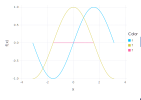

In [13]:
plot([f,fp, x->fp(x) > 0 ? 0 : NaN], -pi, pi)

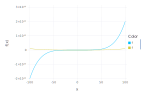

In [14]:
# try it with a made up function
f(x) = 2x^5 + 3x^2 - 4
fp(x) = Df(f)(x)
plot([f,fp],-100, 100)

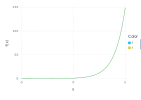

In [15]:
f(x) = exp(x)
fp(x) = Df(f)(x)
plot([f, fp], -5, 5)

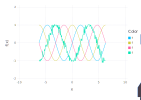

In [16]:
f(x) = sin(x)
fp(x) = Df(f)(x)
fpp(x) = Df(fp)(x)
fppp(x) = Df(fpp)(x)
plot([f, fp, fpp, fppp], -2pi, 2pi)

In [17]:
[Df(f; h=h)(.5) - cos(.5) for h in hs]

8-element Array{Any,1}:
 -0.0254132  
 -0.00241173 
 -0.000239859
 -2.39727e-5 
 -2.39715e-6 
 -2.3969e-7  
 -2.4695e-8  
  2.85032e-10

In [18]:
# even more accurate - the central difference
central_difference(f, x0, h) = (f(x0 + h) - f(x0 - h)) / (2h)

central_difference (generic function with 1 method)

In [19]:
Dfcentral(f; h=0.00001) = x -> central_difference(f, x, h)

Dfcentral (generic function with 1 method)

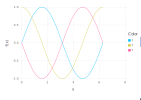

In [20]:
f(x; b=1) = sin(b*x) # f(x) position
fp(x) = Dfcentral(f)(x) # f'(x) velocity
fpp(x) = Dfcentral(fp)(x) # f''(x) acceleration
plot([f, fp, fpp], 0, 2pi)

In [21]:
# compare with the known first derivative df/dxsin(x) = cos(x) at an arbitrary point (0.5)
out = [Dfcentral(f; h=h)(.5) - cos(.5) for h in hs]
[hs out]

8x2 Array{Any,2}:
 0.1     -0.00146191 
 0.01    -1.46263e-5 
 0.001   -1.46264e-7 
 0.0001  -1.46274e-9 
 1.0e-5  -1.75036e-11
 1.0e-6   7.47635e-12
 1.0e-7  -2.70079e-10
 1.0e-8   2.85032e-10

In [22]:
f(t; b=1) = sin(b*t)

f (generic function with 1 method)

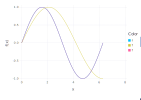

In [23]:
plot([f, t -> f(t, b=.75), t -> f(t, b=1)], 0, 2pi)

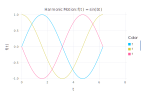

In [24]:
plot([f, Dfcentral(f), Dfcentral(Dfcentral(f))], 0, 2pi, 
Guide.xlabel("t"), Guide.ylabel("f(t)"), Guide.title("Harmonic Motion: f(t) = sin(bt)"))

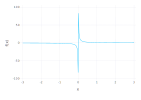

In [25]:
plot(x -> 1/x, -3, 3)

In [26]:
collect(linspace(0,2pi,10))

10-element Array{Float64,1}:
 0.0     
 0.698132
 1.39626 
 2.0944  
 2.79253 
 3.49066 
 4.18879 
 4.88692 
 5.58505 
 6.28319 

In [27]:
(1/10).^(1:10)

10-element Array{Float64,1}:
 0.1    
 0.01   
 0.001  
 0.0001 
 1.0e-5 
 1.0e-6 
 1.0e-7 
 1.0e-8 
 1.0e-9 
 1.0e-10

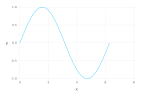

In [28]:
xs = linspace(0,2pi,100)
ys = map(f,xs)
plot(x = xs, y = ys, Geom.line)

In [29]:
function secline(f, a, b)
    m = (f(b) - f(a)) / (b - a)
    x -> f(a) + m * (x - a)
end

secline (generic function with 1 method)

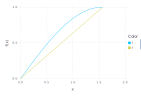

In [30]:
a, b = 0, pi/2
plot([f, secline(f,a,b)], a, b)

In [31]:
# some things with e


In [71]:
Df(f, h=1) = x -> (f(x + h) - f(x - h)) / (2h)

Df (generic function with 2 methods)

In [74]:
f(x) = (1 - (1/x))^x

f (generic function with 1 method)

In [76]:
map(f,collect(1:10))

10-element Array{Float64,1}:
 0.0     
 0.25    
 0.296296
 0.316406
 0.32768 
 0.334898
 0.339917
 0.343609
 0.346439
 0.348678

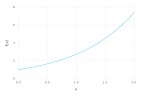

In [59]:
using Roots
plot(exp, 0, 2)